# Statistics review 7: Correlation and regression

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC374386/pdf/cc2401.pdf)

## Key learning points

- Correlation quantifies the strength of the linear relationship between a pair of variables
- Regression expresses the relationship in the form of an equation

In [1]:
suppressPackageStartupMessages(library(tidyverse))

In [2]:
options(repr.plot.width=4, repr.plot.height=3)

## Scatter diagram

In [3]:
age <- c(60, 76, 81, 89, 44, 58, 55, 74, 45, 67, 72,
         91, 76, 39, 71, 56, 77, 37, 64, 84)
urea <- c(1.099, 1.723, 2.054, 2.262, 1.686, 1.988, 1.131, 1.917, 1.548, 1.386,
              2.617, 2.701, 2.054, 1.526, 2.002, 1.526, 1.825, 1.435, 2.460, 1.932)

ae <- data.frame(subject=1:20, age=age, urea=urea)

In [4]:
head(ae)

subject,age,urea
1,60,1.099
2,76,1.723
3,81,2.054
4,89,2.262
5,44,1.686
6,58,1.988


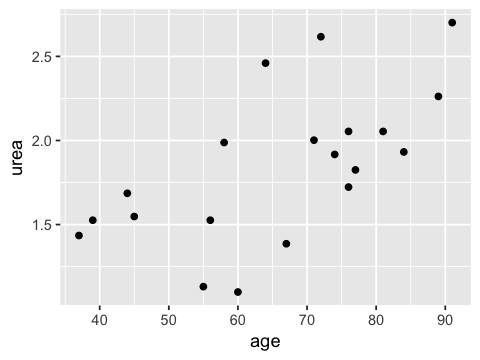

In [5]:
ggplot(ae, aes(x=age, y=urea)) + geom_point()

## Correlation

### Function to calculate Pearson's correlatin 

In [6]:
pearson <- function(x, y) {
    xbar <- mean(x)
    ybar <- mean(y)
    sum((x - xbar)*(y-ybar))/sqrt(sum((x-xbar)^2)*sum((y-ybar)^2))
}

In [7]:
round(pearson(x=ae$age, y=ae$urea), 2)

[1] 0.62

### Using built-in function

In [8]:
round(cor(x=ae$age, y=ae$urea, method = 'pearson'), 2)

[1] 0.62

## Hypothesis test of correlation 

In [9]:
cor.test(x=ae$age, y=ae$urea)


	Pearson's product-moment correlation

data:  ae$age and ae$urea
t = 3.3538, df = 18, p-value = 0.003535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2447935 0.8338342
sample estimates:
      cor 
0.6201371 


## Confidence interval for the population correlation coefficient

This is also provided by the built in test function.

In [10]:
z <- c(0.5 * log((1+0.62)/(1 - 0.62)))
se <- 1/sqrt(20 -3)

In [11]:
z.ci <- c(z - 1.96*se, z + 1.96*se)
round(z.ci, 2)

[1] 0.25 1.20

In [12]:
ci <- c((exp(2*z.ci[1]) - 1)/(exp(2*z.ci[1]) + 1), 
        (exp(2*z.ci[2]) - 1)/(exp(2*z.ci[2]) + 1))
round(ci, 2)

[1] 0.24 0.83

### Misuse of correlation

#### Correlations may arise from third variable

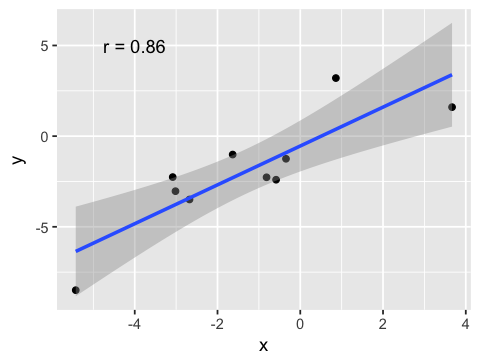

In [13]:
z <- 3*rnorm(10)
x <- z + rnorm(10)
y <- z + rnorm(10)

df <- data.frame(x=x, y=y)

ggplot(df, aes(x=x, y=y)) + geom_point() + geom_smooth(method=lm) +
annotate("text", x=-4, y=5, label = paste("r =", round(cor(df$x, df$y), 2)))

#### Correlations can be misleading if relationships are non-linear

In [14]:
head(anscombe)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04


In [15]:
g1 <- ggplot(anscombe, aes(x=x1, y=y1)) + 
geom_point() + geom_smooth(method=lm) +
annotate("text", x=6, y=9, 
         label = paste("r =", round(cor(anscombe$x1, anscombe$y1), 2)))
g2 <- ggplot(anscombe, aes(x=x2, y=y2)) + 
geom_point() + geom_smooth(method=lm) +
annotate("text", x=6, y=9,
         label = paste("r =", round(cor(anscombe$x2, anscombe$y2), 2)))
g3 <- ggplot(anscombe, aes(x=x3, y=y3)) + 
geom_point() + geom_smooth(method=lm) +
annotate("text", x=6, y=11, 
         label = paste("r =", round(cor(anscombe$x3, anscombe$y3), 2)))
g4 <- ggplot(anscombe, aes(x=x4, y=y4)) + 
geom_point() + geom_smooth(method=lm) +
annotate("text", x=10, y=11,
         label = paste("r =", round(cor(anscombe$x4, anscombe$y4), 2)))

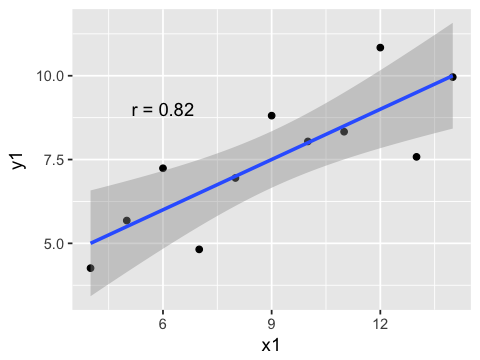

In [16]:
g1

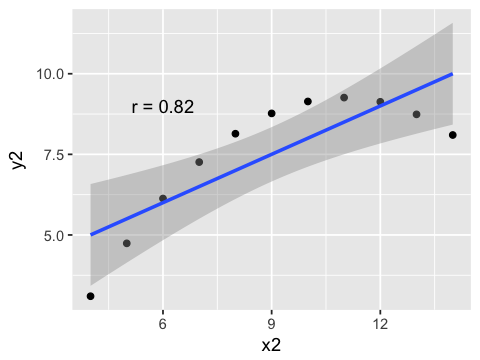

In [17]:
g2

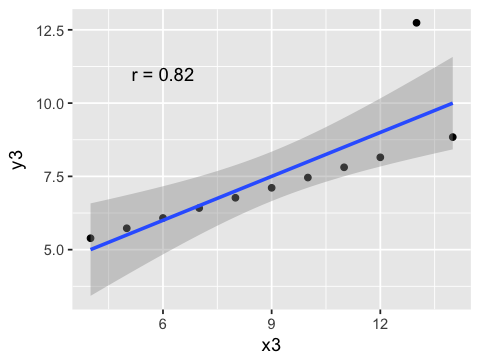

In [18]:
g3

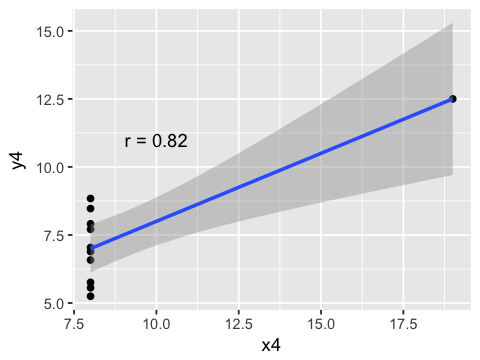

In [19]:
g4

#### Correlations may arise from subgroups

In [20]:
m <- rnorm(10, 70, 4)
f <- rnorm(10, 65, 3.5)
x.m <- rnorm(10, 0)
x.f <- rnorm(10, 6)

df <- data.frame(x=c(x.f, x.m), height=c(f, m), 
                 sex=c(rep("f", 10), rep("m", 10)))

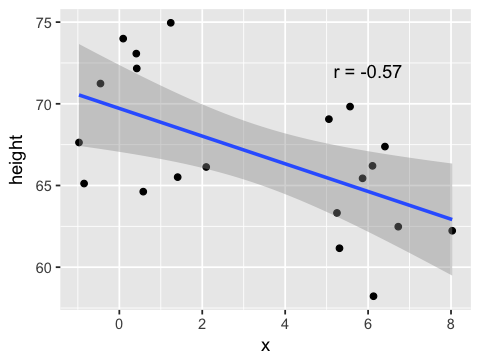

In [21]:
ggplot(df, aes(x=x, y=height)) + geom_point() + 
geom_smooth(method=lm) +
annotate("text", x=6, y=72, 
         label = paste("r =", round(cor(df$x, df$height), 2)))

## Regression

#### Method of least squares

In [22]:
x <- ae$age
xbar <- mean(x)
y <- ae$urea
ybar <- mean(y)

In [23]:
b <- sum((x - xbar)*(y - ybar))/sum((x-xbar)^2)
a <- ybar - b*xbar
round(c(a, b), 4)

[1] 0.7147 0.0172

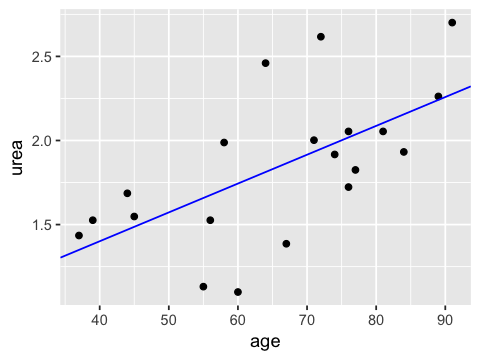

In [24]:
ggplot(ae, aes(x=age, y=urea)) + geom_point() + 
geom_abline(aes(intercept=a, slope=b), color="blue")

## Hypothesis tests and confidence intervals

In [25]:
fit <- lm(urea ~ age, data=ae)
summary(fit)


Call:
lm(formula = urea ~ age, data = ae)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64509 -0.21403  0.02789  0.16075  0.66703 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.714698   0.346129   2.065  0.05365 . 
age         0.017157   0.005116   3.354  0.00354 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3606 on 18 degrees of freedom
Multiple R-squared:  0.3846,	Adjusted R-squared:  0.3504 
F-statistic: 11.25 on 1 and 18 DF,  p-value: 0.003535


#### The p value for age is the same as the p value from the corrrelation test

In [26]:
cor.test(ae$age, ae$urea)


	Pearson's product-moment correlation

data:  ae$age and ae$urea
t = 3.3538, df = 18, p-value = 0.003535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2447935 0.8338342
sample estimates:
      cor 
0.6201371 


## Analysis of variance

![anova](anova.png)

In [27]:
fit.aov <- anova(fit)
fit.aov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
age,1,1.462673,1.4626726,11.24785,0.003535245
Residuals,18,2.340724,0.1300402,NA,NA


### Residuals

In [28]:
ae$predicted <- predict(fit)
ae$residuals <- residuals(fit)

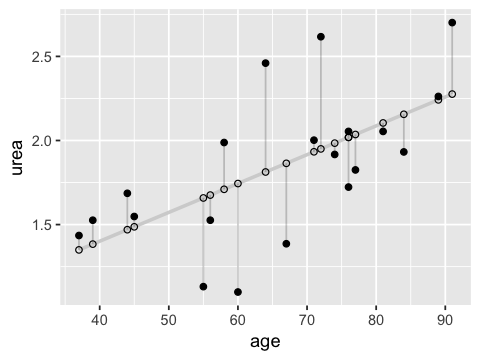

In [29]:
ggplot(ae, aes(x = age, y = urea)) +
  geom_smooth(method = "lm", se = FALSE, color = "lightgrey") +  # Plot regression slope
  geom_segment(aes(xend = age, yend = predicted), alpha = .2) +  # alpha to fade lines
  geom_point() +
  geom_point(aes(y = predicted), shape = 1)

## Coefficient of determination

In [30]:
Regression_sum_of_squares <- fit.aov$'Sum Sq'[1]
Total_sum_of_squares <- fit.aov$'Sum Sq'[2]
round(c(Regression_sum_of_squares, Total_sum_of_squares), 4)

[1] 1.4627 2.3407

### Explained variance

Age accounts for 38% of the total varia- tion in ln urea

In [31]:
r_squared = (Regression_sum_of_squares/Total_sum_of_squares)^2
round(r_squared, 2)

[1] 0.39

## Prediction

In [32]:
newdata <- data.frame(age = seq(40, 90, 10))
newdata$urea.pred <- predict(fit, newdata)
newdata

age,urea.pred
40,1.400961
50,1.572526
60,1.744092
70,1.915658
80,2.087223
90,2.258789


#### Confidence intervals of prediction

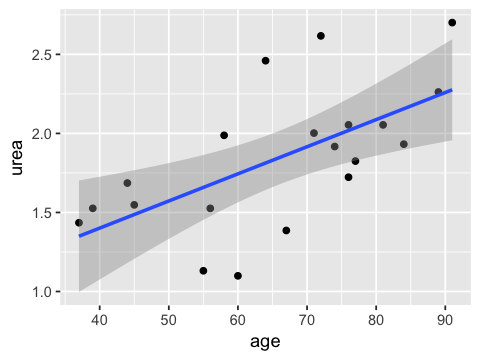

In [33]:
ggplot(ae, aes(x=age, y=urea)) + geom_point() + geom_smooth(method=lm, )

#### Assumptions

In [34]:
names(fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

`geom_smooth()` using method = 'loess'


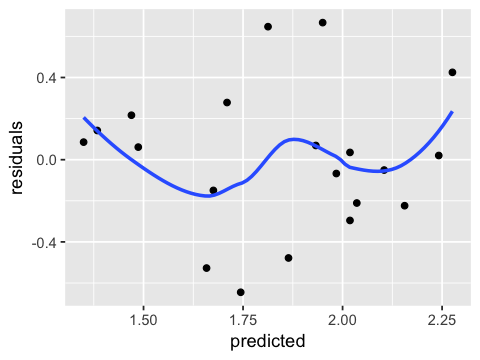

In [35]:
ggplot(ae, aes(x=predicted, y=residuals)) + 
geom_point() + geom_smooth(se=FALSE)

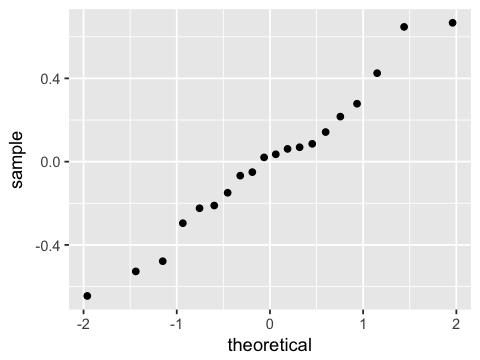

In [36]:
ggplot(ae, aes(sample=residuals)) + stat_qq()

### Default diagnostic plots

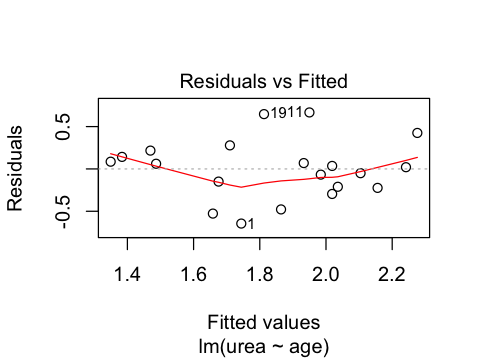

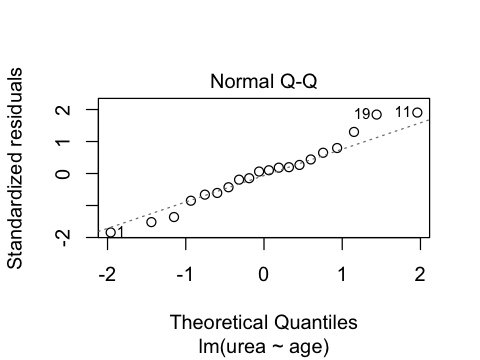

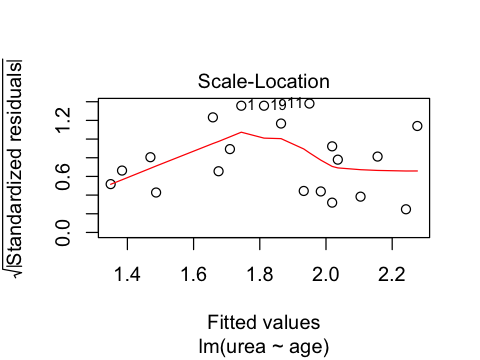

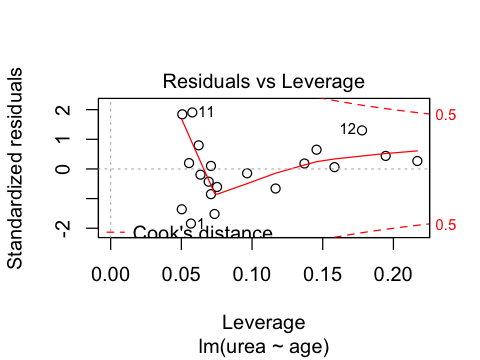

In [37]:
plot(fit)

## Exercises

You may need to install the `car` package in R in the usual way:
```R
install.packages("car")
```

In [38]:
suppressPackageStartupMessages(library(car))

In [39]:
head(Davis)

sex,weight,height,repwt,repht
M,77,182,77,180
F,58,161,51,159
F,53,161,54,158
M,68,177,70,175
F,59,157,59,155
M,76,170,76,165


**1**. Find the correlation between age and height for males and females in the `Davis` data set.

**2**. Test if the correlation is significant.

**3**. Repeat exercises 1 and 2 taking for each sex spearately.

**4**. Show separate linear regressions of weight (y-axis) on height (x-axis) for each sex, either on the same plot (using different colors) or on different subplots.

**5**. What is the predicted weight of a female who is 165 cm tall?